In [75]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [76]:
# Load daily data from Yahoo finance:
Large_Caps=['ES=F', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'BRK-A', 'NVDA', 'META', 'TSLA']
start_date = '2022-01-01'
yesterday=datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
df = yf.download(Large_Caps, start_date)['Adj Close']
df=df.dropna()
df = df.rename(columns={'ES=F': 'S&P500'})
df

[*********************100%***********************]  9 of 9 completed


,AAPL,AMZN,BRK-A,S&P500,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,,,
2021-12-31,177.08,166.72,"450,662.00","4,758.50",144.85,336.35,334.85,294.00,"1,056.78"
2022-01-03,181.51,170.40,"454,300.00","4,786.00",144.99,338.54,333.28,301.10,"1,199.78"
2022-01-04,179.21,167.52,"465,725.00","4,784.25",144.40,336.53,327.57,292.79,"1,149.59"
2022-01-05,174.44,164.36,"467,274.00","4,692.50",137.77,324.17,314.99,275.93,"1,088.12"
2022-01-06,171.53,163.25,"473,153.00","4,687.50",137.75,332.46,312.50,281.67,"1,064.70"
...,...,...,...,...,...,...,...,...,...
2022-07-21,155.35,124.63,"430,900.00","4,001.25",114.34,183.17,264.84,180.50,815.12
2022-07-22,154.09,122.42,"429,562.00","3,965.00",107.90,169.27,260.36,173.19,816.73
2022-07-25,152.95,121.14,"432,579.00","3,970.00",107.51,166.65,258.83,170.24,805.30


In [77]:
#calculate the daily returns and sum of daily returns:
daily_returns = df.pct_change()
total_returns = daily_returns.sum()

In [78]:
#Find the companies that outperform S&P500:
df_better = total_returns[ total_returns >= total_returns['S&P500'] ]
df_sorted = df_better.sort_values(ascending=False)
print('--- Companies with better performance relative to S&P500 ---')
print(df_sorted)

--- Companies with better performance relative to S&P500 ---
BRK-A    -0.03
AAPL     -0.10
TSLA     -0.13
S&P500   -0.16
dtype: float64


In [79]:
df_worse= total_returns[ total_returns <= total_returns['S&P500'] ]
df_sorted2 = df_worse.sort_values(ascending=False)
print('--- Companies with worse performance relative to S&P500---')
print(df_sorted2)

--- Companies with worse performance relative to S&P500---
S&P500   -0.16
MSFT     -0.20
GOOGL    -0.21
AMZN     -0.26
NVDA     -0.40
META     -0.56
dtype: float64


In [80]:
# Prices in the first and last day and return in the last day relative to the first day:
rows=[]
for column in df.columns:
    stock=column
    first = df[column][0]
    last = df[column][-2]
    change = 100 * (last-first)/first
    rows.append([stock,first,last,change])
#print(rows)
df1=pd.DataFrame(rows, columns=["Stock","Price in {}".format(start_date),"Price in {}".format(yesterday),"% Change"])
df_sorted2 = df1.sort_values(by=['% Change'], ascending=False)
print("%Change in the stock price of Largest Companies relative to the price in {}".format(start_date))
pd.options.display.float_format = "{:,.2f}".format #display float values to two decimal places.
print(df_sorted2)

%Change in the stock price of Largest Companies relative to the price in 2022-01-01
    Stock  Price in 2022-01-01  Price in 2022-07-26  % Change
2   BRK-A           450,662.00           428,644.00     -4.89
0    AAPL               177.08               151.60    -14.39
3  S&P500             4,758.50             3,923.25    -17.55
6    MSFT               334.85               251.90    -24.77
8    TSLA             1,056.78               776.58    -26.51
4   GOOGL               144.85               105.02    -27.50
1    AMZN               166.72               114.81    -31.13
7    NVDA               294.00               165.33    -43.76
5    META               336.35               159.15    -52.68


In [81]:
# Define line-styles
from itertools import cycle
lines = ["-","-","-","--",":"]
#lines = ["-","--","-.",":"]
linecycler = cycle(lines)

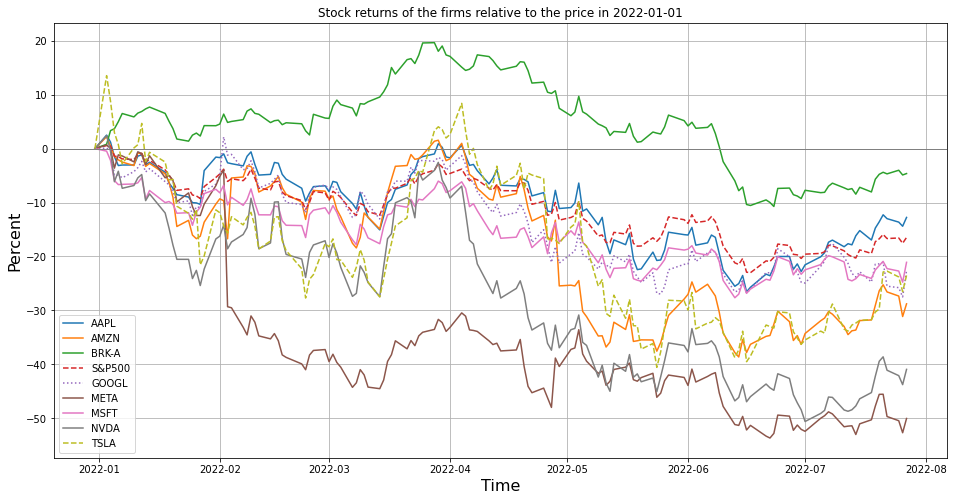

In [82]:
# plot the % changes 
plt.figure(figsize=(16,8))
for col in df.columns:
    df["p_" + col] = (df[col] / df[col].iat[0] - 1) * 100
    plt.plot(df["p_" + col], next(linecycler))

plt.legend(df.columns)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Percent', fontsize=16)
plt.title("Stock returns of the firms relative to the price in {}".format(start_date))
plt.axhline(y = 0, color = 'gray', linewidth=1)
plt.grid()
plt.show()